In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

"Variables Temporales"

Accidentes a partir de su horario, diasemana, fecha-completa, hora, periodo.

In [ ]:
# Crear una variable de clasificación según la hora del día
def clasificar_hora(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Crear la columna 'HORA_DEL_DIA' a partir de la hora registrada
df['HORA_DEL_DIA'] = df['HORA'].apply(clasificar_hora)

# Crear la columna 'PERIODO_DIA' según el día de la semana
df['PERIODO_DIA'] = df['DIASEMANA'].apply(lambda x: 'Laboral' if x <= 5 else 'Fin de Semana')

# Crear la columna 'FECHA_COMPLETA' combinando año, mes y día
df['FECHA_COMPLETA'] = pd.to_datetime(df[['ANIO', 'MES', 'DIA']].rename(columns={
    'ANIO': 'year',
    'MES': 'month',
    'DIA': 'day'
}))

# Verificar el resultado
print(df[['HORA', 'HORA_DEL_DIA', 'DIASEMANA', 'PERIODO_DIA', 'FECHA_COMPLETA']].head())

   HORA HORA_DEL_DIA  DIASEMANA PERIODO_DIA FECHA_COMPLETA
0     4    Madrugada          4     Laboral     2019-01-03
1     9       Mañana          4     Laboral     2019-01-03
2    10       Mañana          4     Laboral     2019-01-03
3    14        Tarde          4     Laboral     2019-01-03
4    19        Noche          4     Laboral     2019-01-03


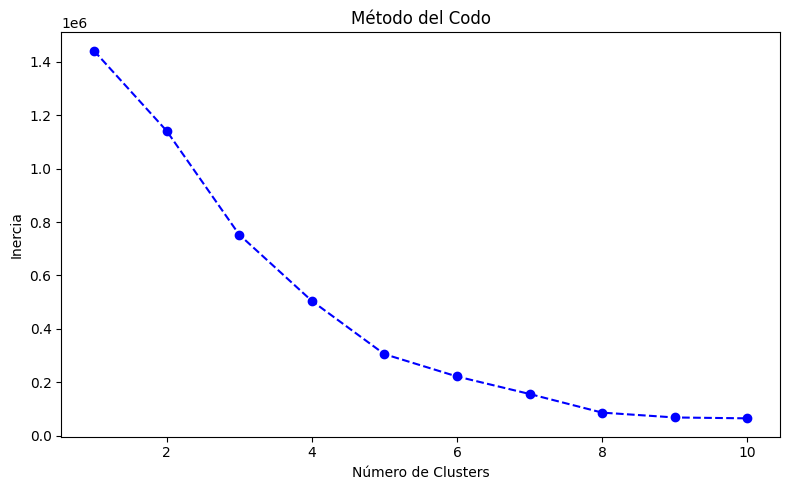

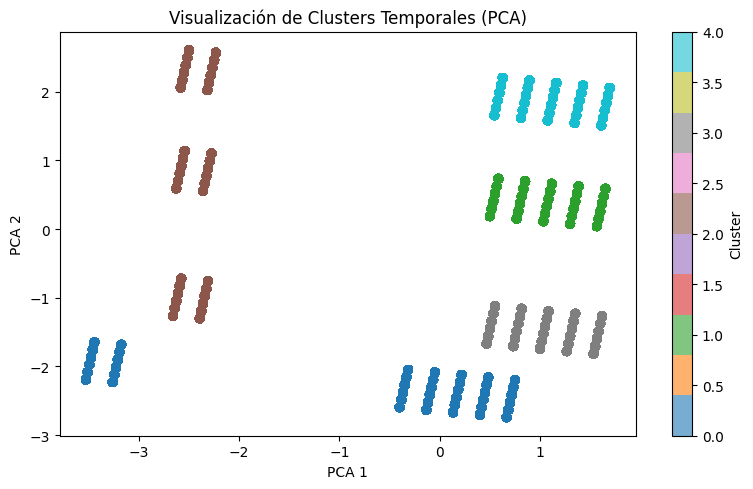

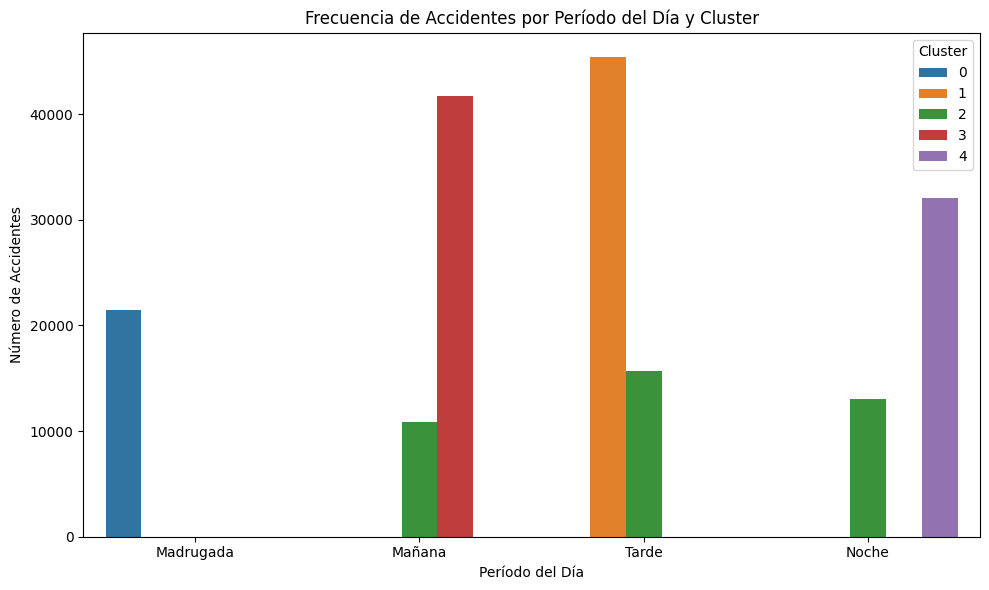

Frecuencia agrupada por período del día y cluster:
   CLUSTER_TEMPORAL HORA_DEL_DIA  Frecuencia
0                 0    Madrugada       21441
1                 1        Tarde       45433
2                 2       Mañana       10828
3                 2        Noche       12997
4                 2        Tarde       15650
5                 3       Mañana       41770
6                 4        Noche       32100


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

def clasificar_hora(h):
    if 0 <= h < 6:
        return 'Madrugada'
    elif 6 <= h < 12:
        return 'Mañana'
    elif 12 <= h < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['HORA_DEL_DIA'] = df['HORA'].apply(clasificar_hora)
df['PERIODO_DIA'] = df['DIASEMANA'].apply(lambda x: 'Laboral' if x <= 5 else 'Fin de Semana')

# Codificar variables categóricas temporales
df_temp = df[['HORA_DEL_DIA', 'PERIODO_DIA', 'DIASEMANA', 'HORA']].copy()
df_temp = pd.get_dummies(df_temp, columns=['HORA_DEL_DIA', 'PERIODO_DIA'])

# Escalado
df_scaled = StandardScaler().fit_transform(df_temp)

# Método del codo para determinar número óptimo de clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.tight_layout()
plt.show()

# Aplicar KMeans con k óptimo elegido
kmeans = KMeans(n_clusters=5, random_state=42)
df['CLUSTER_TEMPORAL'] = kmeans.fit_predict(df_scaled)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=df['CLUSTER_TEMPORAL'], cmap='tab10', alpha=0.6)
plt.title("Visualización de Clusters Temporales (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Agrupación por cluster y periodo del día
agrupado = df.groupby(['CLUSTER_TEMPORAL', 'HORA_DEL_DIA']).size().reset_index(name='Frecuencia')

# Orden personalizado de los periodos del día
orden_periodos = ['Madrugada', 'Mañana', 'Tarde', 'Noche']

# Gráfico de barras agrupado por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=agrupado, x='HORA_DEL_DIA', y='Frecuencia', hue='CLUSTER_TEMPORAL', order=orden_periodos, palette='tab10')
plt.title("Frecuencia de Accidentes por Período del Día y Cluster")
plt.xlabel("Período del Día")
plt.ylabel("Número de Accidentes")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("Frecuencia agrupada por período del día y cluster:")
print(agrupado)

Conclusión: Cada cluster representa un patrón de comportamiento temporal diferente en los accidentes. Algunos clusters concentran más accidentes en la madrugada, mientras otros en la tarde o noche. Esto puede ser útil para estrategias de prevención específicas por horario.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

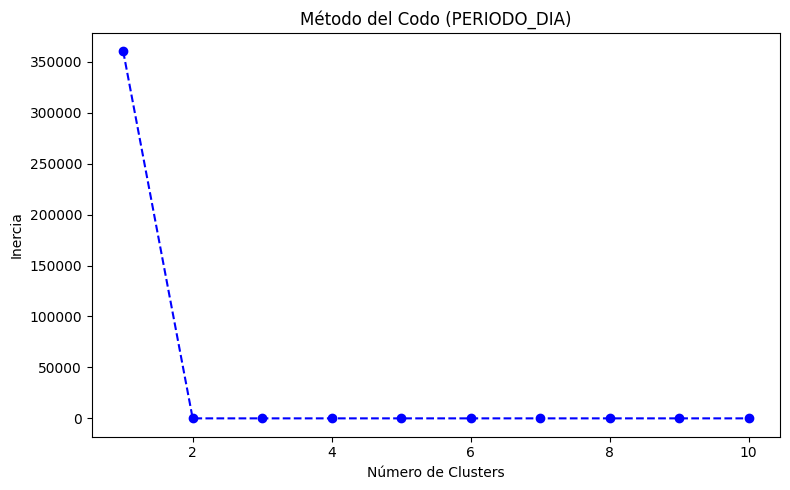

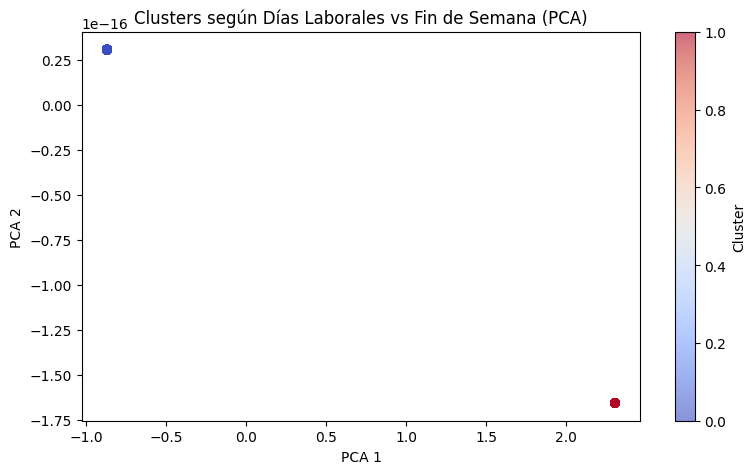

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

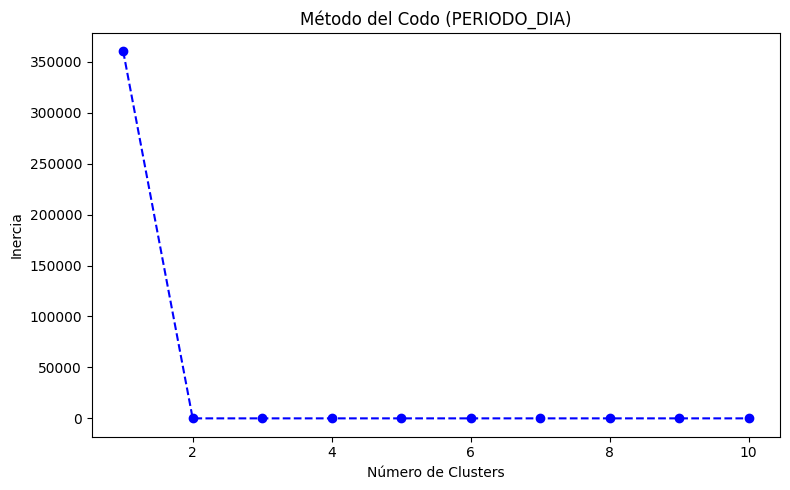

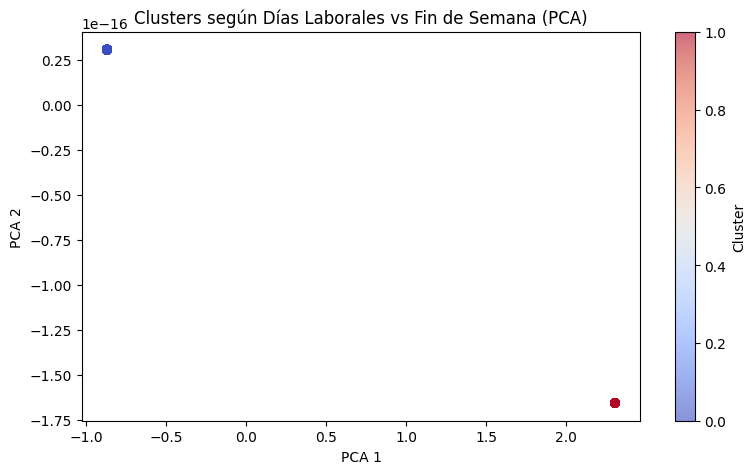

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

df['PERIODO_DIA'] = df['DIASEMANA'].apply(lambda x: 'Laboral' if x <= 5 else 'Fin de Semana')

# Codificar variable PERIODO_DIA
df_temp = pd.get_dummies(df[['PERIODO_DIA']], drop_first=False)

# Escalado de datos
df_scaled = StandardScaler().fit_transform(df_temp)

# Método del codo para determinar número óptimo de clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo (PERIODO_DIA)")
plt.tight_layout()
plt.show()

# Aplicar KMeans con número óptimo (por ejemplo 2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['CLUSTER_DIA'] = kmeans.fit_predict(df_scaled)

# Visualización con PCA
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=df['CLUSTER_DIA'], cmap='coolwarm', alpha=0.6)
plt.title("Clusters según Días Laborales vs Fin de Semana (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

df['PERIODO_DIA'] = df['DIASEMANA'].apply(lambda x: 'Laboral' if x <= 5 else 'Fin de Semana')

# Codificar variable PERIODO_DIA
df_temp = pd.get_dummies(df[['PERIODO_DIA']], drop_first=False)

# Escalado de datos
df_scaled = StandardScaler().fit_transform(df_temp)

# Método del codo para determinar número óptimo de clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo (PERIODO_DIA)")
plt.tight_layout()
plt.show()

# Aplicar KMeans con número óptimo (por ejemplo 2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['CLUSTER_DIA'] = kmeans.fit_predict(df_scaled)

# Visualización con PCA
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=df['CLUSTER_DIA'], cmap='coolwarm', alpha=0.6)
plt.title("Clusters según Días Laborales vs Fin de Semana (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

El agrupamiento basado en días laborales vs fines de semana muestra que los accidentes pueden diferenciarse entre estos dos periodos. Esto puede ser útil para políticas viales diferenciadas según el tipo de día.

Patrones Temporales en Fechas Específicas.

Los meses con más accidentes tienden a ser los de temporadas festivas o vacaciones (como diciembre o julio).
Algunos días específicos presentan más accidentes, lo que podría deberse a eventos especiales, condiciones meteorológicas o festividades.

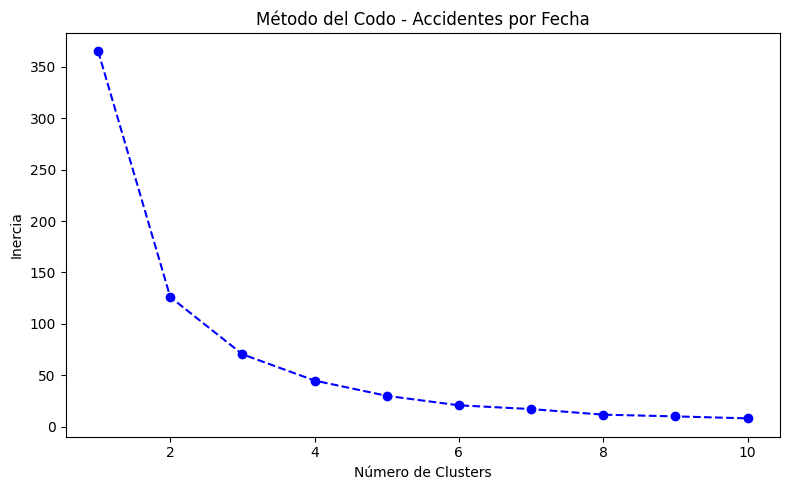

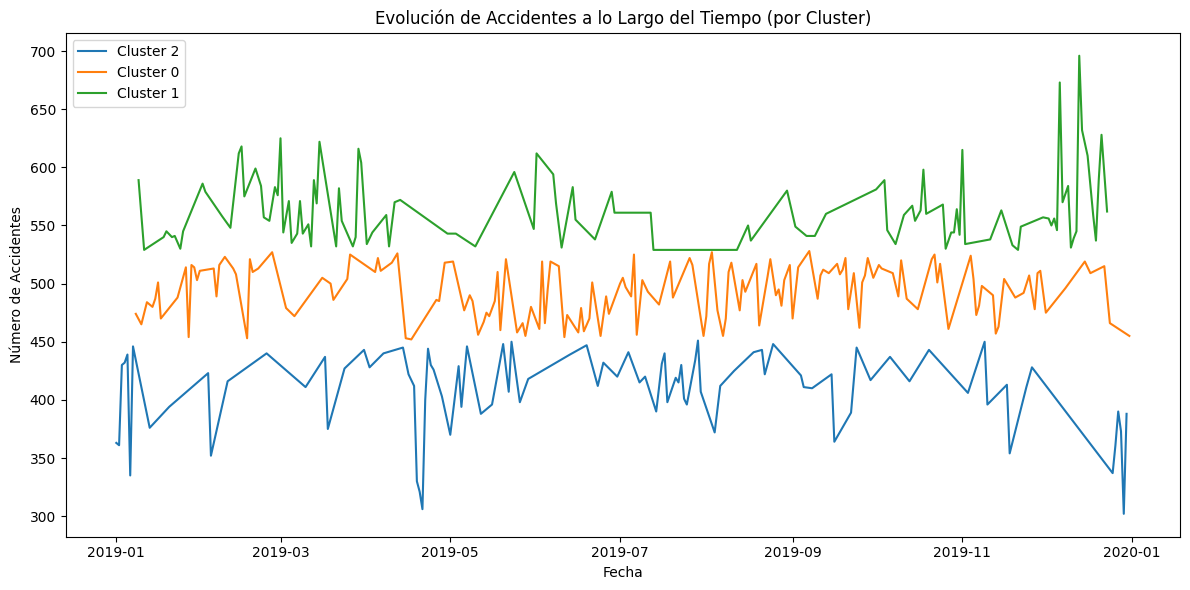

Frecuencia de accidentes en fechas específicas:
                TOTAL  CLUSTER_FECHA
FECHA_COMPLETA                      
2019-01-01        363              2
2019-01-02        361              2
2019-01-03        430              2
2019-01-04        432              2
2019-01-05        439              2
2019-01-06        335              2
2019-01-07        446              2
2019-01-08        474              0
2019-01-09        589              1
2019-01-10        465              0
2019-01-11        529              1
2019-01-12        484              0
2019-01-13        376              2
2019-01-14        480              0
2019-01-15        487              0
2019-01-16        501              0
2019-01-17        470              0
2019-01-18        540              1
2019-01-19        545              1
2019-01-20        394              2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

# Crear columna de fecha completa para análisis temporal
df['FECHA_COMPLETA'] = pd.to_datetime(df[['ANIO', 'MES', 'DIA']].rename(columns={'ANIO': 'year', 'MES': 'month', 'DIA': 'day'}))

# Convertir la columna de fecha en índice
df.set_index('FECHA_COMPLETA', inplace=True)

# Resumir el número de accidentes por día
accidentes_por_fecha = df.resample('D').size().to_frame(name='TOTAL')

# Escalar los datos
df_scaled = StandardScaler().fit_transform(accidentes_por_fecha)

# Método del codo para encontrar número óptimo de clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo - Accidentes por Fecha")
plt.tight_layout()
plt.show()

# Aplicar KMeans con número óptimo
kmeans = KMeans(n_clusters=3, random_state=42)
accidentes_por_fecha['CLUSTER_FECHA'] = kmeans.fit_predict(df_scaled)

# Visualización con PCA
if df_scaled.shape[1] > 1:
    pca = PCA(n_components=2)
    datos_pca = pca.fit_transform(df_scaled)

    plt.figure(figsize=(10, 6))
    plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=accidentes_por_fecha['CLUSTER_FECHA'].values, cmap='Set1', alpha=0.6)
    plt.title("Clusters de Accidentes por Fecha (PCA)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')
    plt.tight_layout()
    plt.show()

# Gráfico de evolución diaria con colores por cluster
plt.figure(figsize=(12, 6))
for cluster in accidentes_por_fecha['CLUSTER_FECHA'].unique():
    fechas_cluster = accidentes_por_fecha[accidentes_por_fecha['CLUSTER_FECHA'] == cluster]
    plt.plot(fechas_cluster.index, fechas_cluster['TOTAL'], label=f"Cluster {cluster}")
plt.title("Evolución de Accidentes a lo Largo del Tiempo (por Cluster)")
plt.xlabel("Fecha")
plt.ylabel("Número de Accidentes")
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar primeros resultados
print("Frecuencia de accidentes en fechas específicas:")
print(accidentes_por_fecha.head(20))

Conclusión: Se detectan patrones temporales en la frecuencia de accidentes. Ciertos días o periodos muestran mayor concentración de eventos, lo cual puede relacionarse con días festivos, fines de semana largos o eventos especiales.